# t-Test

The t-test task can be used to test for:
<ol>
    <li>differences between two independent group means</li> 
    <li>differences of one group mean from some hypothesized value</li>
    <li>differences between paired groups (for example, before/after scores)</li>
    <li>the assumptions  of normality of errors and equality of variances by providing histograms and quantile-quantile (QQ) plots</li>
</ol>

## Data set: CASchools
We will use both the t-test and ANOVA test with the <a href="https://vincentarelbundock.github.io/Rdatasets/doc/AER/CASchools.html">CASchools data set</a> from the "AER" R package. 
    
<ul>    
    <li><strong>district:</strong> character. District code.</li>
    <li><strong>school:</strong> character. School name.</li>
    <li><strong>county:</strong> factor indicating county.</li>
    <li><strong>grades:</strong> factor indicating grade span of distrct.</li>
    <li><strong>students:</strong> Total enrollment.</li>
    <li><strong>teachers:</strong> Number of teachers.</li>
    <li><strong>calworks:</strong> Percent qualifying for CalWorks (income assistance).</li>
    <li><strong>lunch:</strong> Percent qualifying for reduced-price lunch.</li>
    <li><strong>computer:</strong> Number of computers.</li>
    <li><strong>expenditure:</strong> Expenditure per student.</li>
    <li><strong>income:</strong> District average income (in 1999 USD 1,000).</li>
    <li><strong>english:</strong> Percent of English learners.</li>
    <li><strong>read:</strong> Average reading score.</li>
    <li><strong>math:</strong> Average math score.</li>
</ul>
    

The data used here are from all 420 K-6 and K-8 districts in California with data available for 1998 and 1999. Test scores are on the Stanford 9 standardized test administered to 5th grade students. School characteristics (averaged across the district) include enrollment, number of teachers (measured as “full-time equivalents”, number of computers per classroom, and expenditures per student. Demographic variables for the students are averaged across the district. The demographic variables include the percentage of students in the public assistance program CalWorks (formerly AFDC), the percentage of students that qualify for a reduced price lunch, and the percentage of students that are English learners (that is, students for whom English is a second language). 

### Source & Documentation
Online complement to Stock, J. H. and Watson, M. W. (2007). Introduction to Econometrics, 2nd ed. Boston: Addison Wesley. 

Part of the "AER" R Package.

Documentation: https://vincentarelbundock.github.io/Rdatasets/doc/AER/CASchools.html

In [2]:
# Download the data from https://www.dropbox.com/s/2wqm1hy1n2es09j/CASchools.csv?dl=0. 
# Then import the data set in R Studio.

CASchools <- read.csv("CASchools.csv")

# Uncomment the next line in R to view the dataset.
# View(CASchools)

# In this Jupyter Notebook, we'll use the head() function to examine the top of the data set. 
head(CASchools)

,X,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.90,0.5102,2.0408,67,6384.911,22.690001,0.000000,691.6,690.0
2,2,61499,Manzanita Elementary,Butte,KK-08,240,11.15,15.4167,47.9167,101,5099.381,9.824000,4.583333,660.5,661.9
3,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.90,55.0323,76.3226,169,5501.955,8.978000,30.000002,636.3,650.9
4,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.00,36.4754,77.0492,85,7101.831,8.978000,0.000000,651.9,643.5
5,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.50,33.1086,78.4270,171,5235.988,9.080333,13.857677,641.8,639.9
6,6,62042,Burrel Union Elementary,Fresno,KK-08,137,6.40,12.3188,86.9565,25,5580.147,10.415000,12.408759,605.7,605.4


In [4]:
#Examine the variables available, run basic descriptive statistics,
#create simple visualizations, and begin to generate questions. See some examples follow for ideas

summary(CASchools$students) #6-number summary of the numbers of students

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   81.0   379.0   950.5  2628.8  3008.0 27176.0 

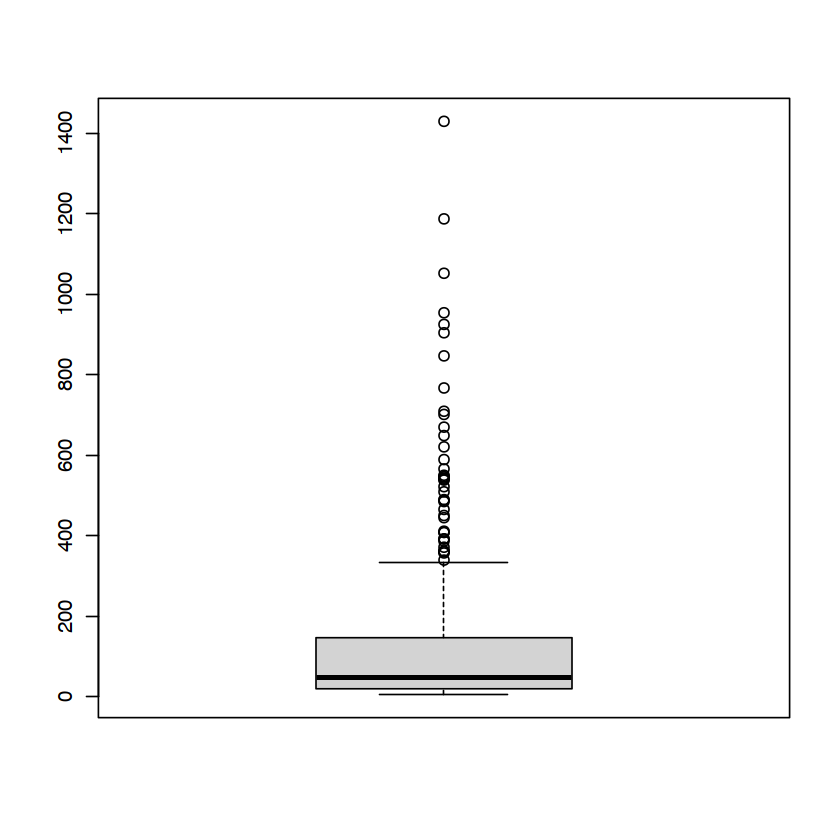

In [5]:
boxplot(CASchools$teachers) #boxplot of the number of teachers

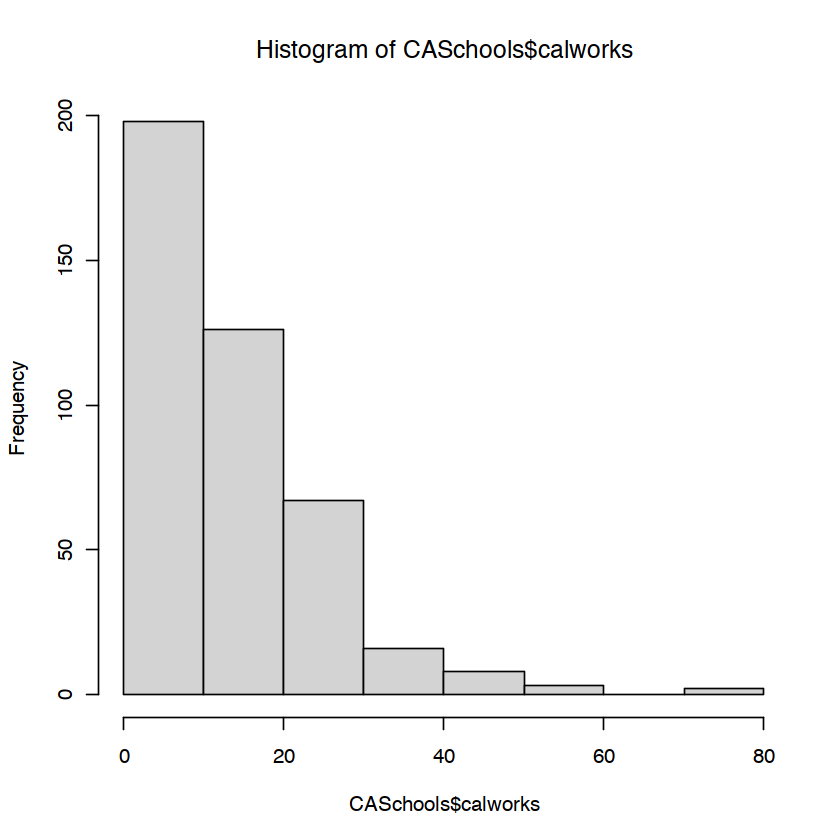

In [6]:
hist(CASchools$calworks) #histogram of the calworks data (Percent qualifying for CalWorks (income assistance).)

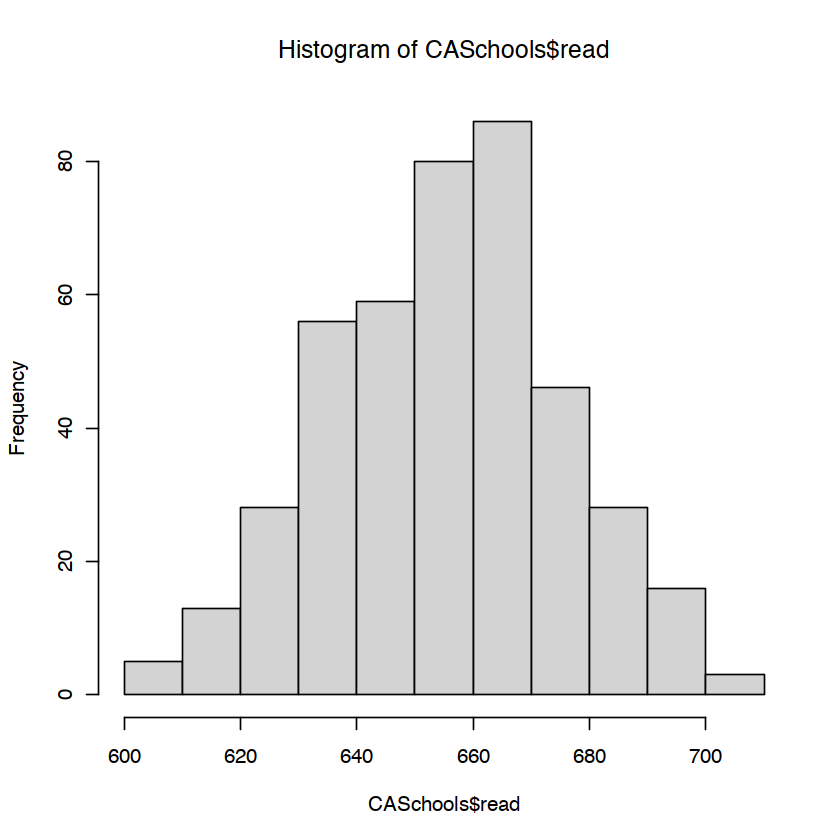

In [7]:
hist(CASchools$read) #histogram of students' average reading scores by school

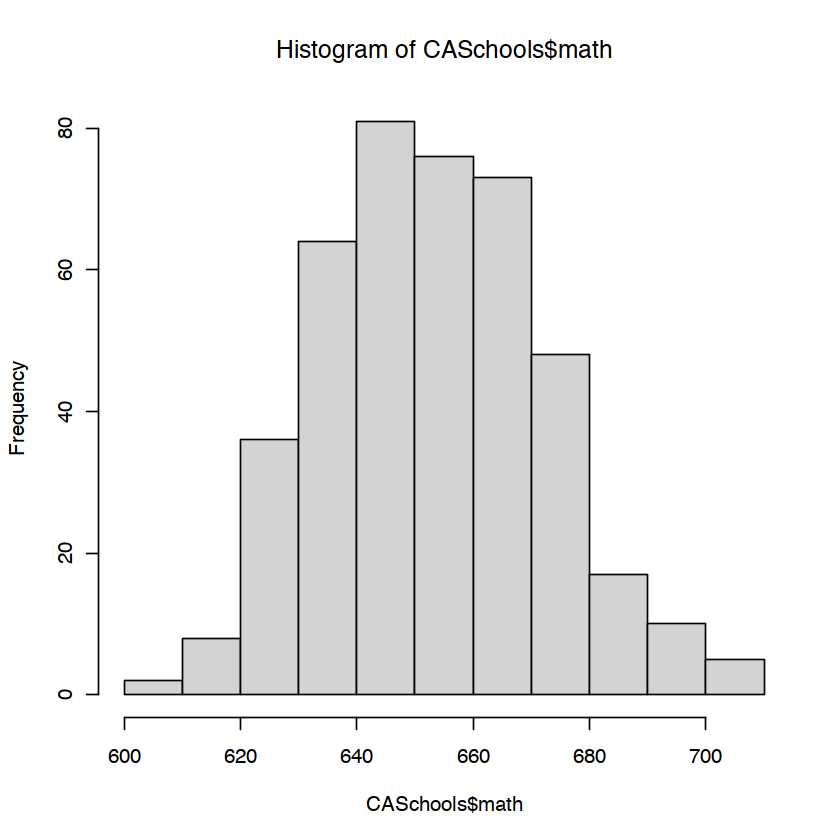

In [8]:
hist(CASchools$math) #histogram of students' average math scores by school

## Sample questions
<ol>
    <li>Is there a difference between the mean reading and math scores?</li>
    <li>Do the mean reading scores differ by county?</li>
    <li>Does the student-teacher ratio differ by county?</li>
    <li>How does the expenditure per student relate to a district's income and the number of students?</li>
</ol>

### Q1. Is there a difference between the mean reading and math scores?

#### Define hypotheses of interest and calculate the test statistic.

<p>H<sub>0</sub>: The true difference between the California math and reading score means is 0.</p>
<p>H<sub>A</sub>: The true difference between the reading and math scores is not 0.</p>

Since we are asking about the difference between the means of two sets of measurements to determine whether fifth-grade students generally perform better on the Stanford standardized reading or math test, we will use a t-test.

#### Criteria for a t-test

For a t-test, we need:
<ol>
    <li>Each sample is collected from a representative random sample from the larger population</li>
    <li>the data's level of measurement is either continuous ratio data or ordinal data (such as test scores)</li>
    <li>2 sets of measurements that are based on two independent, separate groups</li>
    <li>Each sample should contain at least 30 observations for the test to be valid</li>
    <li>The underlying distribution of each sample should be approximately normal</li>
    <li>The variances of the groups are approximately equivalent, which we can test with a general rule of thumb by dividing the larger by the smaller standard deviation of the two groups. If the ratio is less than 2, we can assume approximate equality of group variances.</li>
</ol>

#### Checking assumptions about our data set

1. The data set contains the full population of K-6th grade/K-8th grade schools in California, so it is certainly representative of the state. 
2. The mean reading and math scores per school is ordinal data. 
3. The same students were test on both reading and math, however, each test was taken separately and measures different abilities, so the two groups may be considered to be independent. 
4. Each group contains 420 observations, well above the minimum threshold of 30.
5. We checked the underlying distributions with our histograms above, which show that each group has an approximately normal distribution. 
6. We will check for the equivalence of variances below and find that the ratio of variances is less than 2, so we may proceed with the t-test.

In [11]:
#Compute the sample means of both groups:

mean(CASchools$read)
mean(CASchools$math)

[1] 654.9705

[1] 653.3426

In [13]:
#Next check for equal variance by follwing a general rule of thumb: 
#we can assume equal variance if the ratio of the larger to smaller sample standard deviations is less than 2. 

sd(CASchools$read)
sd(CASchools$math)

#Since the standard deviation of the reading scores is greater than that of the math scores,
#sd(CASchools$read) should be in the numerator.

sd(CASchools$read)/sd(CASchools$math)

[1] 20.10798

[1] 18.7542

[1] 1.072185

#### Equivalence of variance
Since the ratio is less than 2, we can assume equal variance and proceed with a "pooled" t-test. 

In an unpooled t-test, there is no assumption that the variances of the two samples are equal. However, if you can assume equivalence of variances, the precision of the test improves. 

The t.test command enables pooled two-sample t-test by setting the optional argument <strong> var.equal=TRUE</strong>; it is FALSE by default.

In [14]:
# Our hypotheses imply a two-tailed test (because we're checking for the equality of means [difference=0],
# so set the alternative (hypothesis) parameter equal to "two.sided."

t.test(x=CASchools$read, y=CASchools$math, alternative="two.sided", conf.level = 0.95, var.equal = TRUE)


	Two Sample t-test

data:  CASchools$read and CASchools$math
t = 1.2133, df = 838, p-value = 0.2254
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.005601  4.261318
sample estimates:
mean of x mean of y 
 654.9705  653.3426 


### Q1 Result:

There is not sufficient evidence to reject the null hypothesis. Since we fail to reject the null hypothesis, we cannot conclude that there is a difference in means between California students' reading and math scores. In 95 out of 100 trials, the true difference in means lies between -1 and 4.26. This result indicates that fifth-grade California students performed about as well on the math as on the reading standardized test in 1998-1999.

# ANOVA test

## Assumptions to satisfy to generate reliable ANOVA test results

1. Independence: The samples making up the k groups must be independent of one another, and the observations in each group must be independent and identically distributed (iid).
2. Normality: The observations in each group should be normally distributed, or at least approximately so.
3. Equality of variances: The variance of the observations in each group should be equal, or at least approximately so.

NOTE: If the assumptions of the equality of variances or normality are not valid for your data, you may not be able to effectively determine a true difference in the means. 

NOTE: You do not need to have an equal number of observations in each group, but this does lead to an unbalanced ANOVA test, which makes the test results more suspect if the data do not meet the criteria defined in the assumptions above. <strong>For this reason, be sure to check the number of observations in each group.</strong>


## To run a one-way ANOVA test, choose the following variable types in your data set:

1. Quantitative (interval or ratio) variable, which is your dependent or outcome variable. 
<strong>Example:</strong> test scores
2. Categorical (nominal or ordinal) variable, which is your independent variable and the variable by which you'll group the quantitative data. 
<strong>Example:</strong> County

In [15]:
# Use table() to generate an outcome table to summarize the number of observations in each group. 

table(CASchools$county)


        Alameda           Butte       Calaveras    Contra Costa       El Dorado 
              1               6               1               7              10 
         Fresno           Glenn        Humboldt        Imperial            Inyo 
             12               3              17               6               1 
           Kern           Kings            Lake          Lassen     Los Angeles 
             27               9               2               5              27 
         Madera           Marin       Mendocino          Merced        Monterey 
              5               8               1              11               7 
         Nevada          Orange          Placer       Riverside      Sacramento 
              9              11              11               4               7 
     San Benito  San Bernardino       San Diego     San Joaquin San Luis Obispo 
              3              10              21               6               2 
      San Mateo   Santa Bar

### Checking assumptions

#### 1. Independence
The reading scores for each school in each county are all independent observations, unaffected by the reading scores in other schools in other counties. 


#### 2. Equality of Variance
To examine the equality of variances, you can use the same informal rule of thumb as used in the two-sample t-test. That is, you can assume equality of variances if the ratio of the largest sample standard deviation to the smallest is less than 2. However, if we have many more than two groups, as we do in this case, we need a different way to check this assumption.

<strong>Bartlett’s test</strong> is used for testing homogeneity of variances in k samples, where k can be more than two. It’s adapted for normally distributed data. <strong>The Levene test</strong> is a more robust alternative to the Bartlett test when the distributions of the data are <em>non-normal</em>. 

The R function bartlett.test() can be used to compute Barlett’s test. The simplified format is as follow:

bartlett.test(formula, data)

    formula: a formula of the form values ~ groups
    data: a matrix or data frame

The function returns a list containing the following component:

    statistic: Bartlett’s K-squared test statistic
    parameter: the degrees of freedom of the approximate chi-squared distribution of the test statistic.
    p.value: the p-value of the test

The function leveneTest() [in car package] can be used.

    library(car)

Levene's test with one independent variable
    
    leveneTest(quant.data ~ group, data = dataset)

The <strong>Fligner-Killeen</strong> test is one of the many tests for homogeneity of variances which is most robust against departures from normality.

The R function fligner.test() can be used to compute the test.

*Read more at: http://www.sthda.com/english/wiki/compare-multiple-sample-variances-in-r.

In [22]:
#The data are normally distributed, but there are fewer than two schools in several of the counties, 
#so I will use Levene's test instead of Bartlett's. 

library(car)
leveneTest(read ~ county, data = CASchools)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,44,1.627138,0.009199538
,375,NA,NA


#### 2. Equality of Variance

Although our group data is independent and each group's data is normally distributed (we'll check for overall normality in the next section), Levene's test results in a p-value of 0.009, which is far less than our standard alpha-value of 0.05, suggesting that the variances cannot be assumed to be equal across our groups. 

This does not mean we can't use the ANOVA test, we just need be sure to mention this when we report our results so that they are handled with a dose of caution. 

#### 3. Normality Test

Next, we need to consider the assumption of normality of the raw observations. This can be difficult to determine in many real-data examples. At least, though, it's worthwhile to inspect histograms and QQ plots for signs of non-normality. To achieve this, we need to mean-center each score by its respective county's mean by using the following function: 

    tapply 

This function loops through your data table, applying the function you specify with FUN to the data you specify first after the parentheses based on the index you provide as the second paramenter.

We can do this by taking the original vector of scores and subtracting from it the county.means vector, but first, we must rearrange and replicate the latter elements to correspond to the elements in the former. This is done by using as.factor on the factor vector that represents the county. When that vector is passed via the square brackets to county.means, you get the correct group mean matched to each observation. In the context of the current analysis, these group-wise, mean-centered values are also referred to as residuals. 

You can now assess normality of the observations as a whole using the residuals. To inspect a normal QQ plot, use the following functions:

    qqnorm
    qqline


In [23]:
#Use tapply() to get each county's mean reading score.

# In the following case, tapply loops through the CASchools reading scores column, groups the scores by county
# and calculates the mean for each group of schools in each county. 

county.means <-tapply(CASchools$read, INDEX = CASchools$county, FUN=mean)
county.means

Alameda           Butte       Calaveras    Contra Costa       El Dorado 
       691.6000        646.3500        663.4000        675.1429        668.1800 
         Fresno           Glenn        Humboldt        Imperial            Inyo 
       635.6667        664.5667        664.2412        637.1833        662.8000 
           Kern           Kings            Lake          Lassen     Los Angeles 
       637.5778        648.3889        642.8500        663.5800        645.0333 
         Madera           Marin       Mendocino          Merced        Monterey 
       653.3200        684.8500        642.7000        635.2273        638.9429 
         Nevada          Orange          Placer       Riverside      Sacramento 
       669.4000        652.6182        668.8636        638.7750        638.1857 
     San Benito  San Bernardino       San Diego     San Joaquin San Luis Obispo 
       649.0667        648.2300        659.4571        643.1333        667.9500 
      San Mateo   Santa Barbara     Santa Clara      Santa Cruz          Shasta 
       669.4765        666.5636        665.3550        677.1000        660.1077 
       Siskiyou          Sonoma      Stanislaus          Sutter          Tehama 
       653.4333        667.6172        657.0143        654.5000        653.1625 
        Trinity          Tulare        Tuolumne         Ventura            Yuba 
       676.4500        637.2458        658.3667        645.8889        664.2000

In [24]:
read.meancenter <- CASchools$read-county.means[as.factor(CASchools$county)]

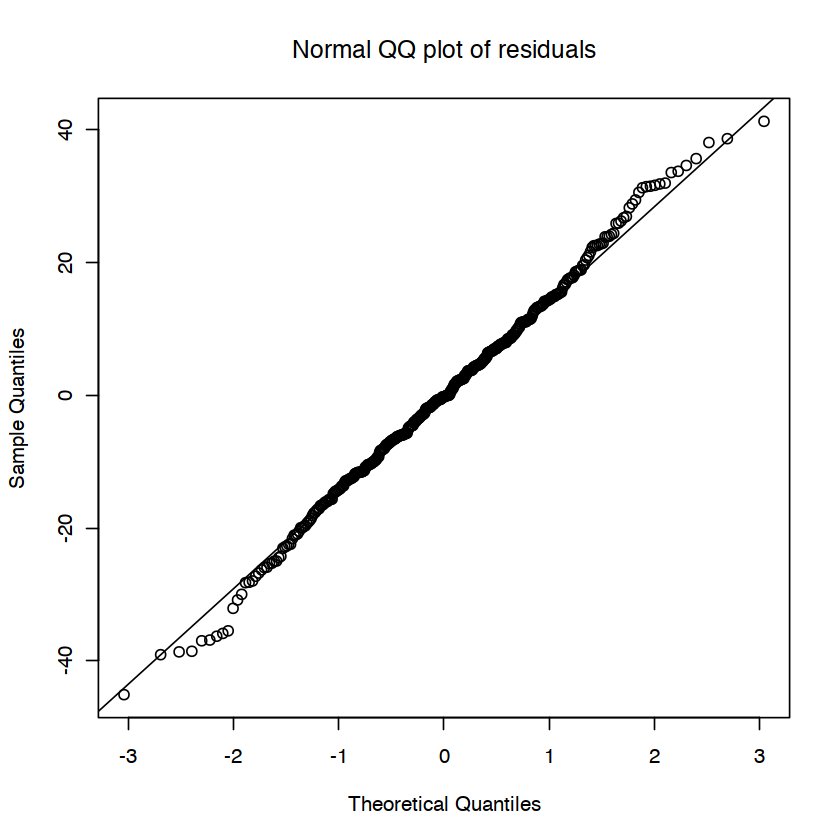

In [25]:
#Create a QQ plot
qqnorm(read.meancenter,main="Normal QQ plot of residuals")
qqline(read.meancenter) 

#The plot shows that the data are normally distributed.

In [27]:
#Run the ANOVA test and save it with an object name
#Order matters: Dependent/outcome variable ~ Independent variable

readOut <- aov(read ~ county, data=CASchools) 

summary(readOut) #Generate the ANOVA table

             Df Sum Sq Mean Sq F value Pr(>F)    
county       44  74284  1688.3   6.655 <2e-16 ***
Residuals   375  95131   253.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
#single step:
summary(aov(read ~ county, data=CASchools))

             Df Sum Sq Mean Sq F value Pr(>F)    
county       44  74284  1688.3   6.655 <2e-16 ***
Residuals   375  95131   253.7                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Analysis of ANOVA Test Results

F-value: 6.655. If p-value < alpha, we can reject the null hypothesis. The standard alpha value is 0.05, which corresponds to a 95% confidence interval, but you can choose a more conservative alpha of 0.01 or even 0.001 instead <strong>prior</strong> to running your test.

The p-value, which represents the probability of getting an F-value at least as large as that reported (6.655), is 2e-16.

Between the actual numerical score of the p-value and the 3 significance stars that R displays, which means that p ≤ 0.001, we can state that p < alpha = 0.01. This means we can reject the null hypothesis that the means across groups are equal. That, in turn, indicates that at least one group's mean is different. There is a statistically significant difference in the mean reading scores across different California counties during the 1998-1999 school year. Strictly speaking, our results indicate that at least one California county has a mean reading score that is not equal to the rest of the counties. 